In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [11]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Drop the columns that are not required 

In [12]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


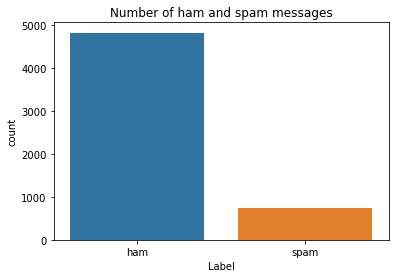

In [14]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

### Create inputs (X) and output(Y)

In [25]:
X = df.v2
Y = df.v1
le = LabelEncoder() #Encode labels with value between 0 and n_classes-1.

In [26]:
Y = le.fit_transform(Y) #return encoded labels 1 and 0
Y = Y.reshape(-1,1)
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

### Split the data into training and test

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
print(len(X_train), len(X_test))

(4736, 836)


### Process the data
1. Tokenize the data and convert the text to sequences.
2. Add padding to ensure that all the sequences have the same shape.
3. There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.

In [38]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[  0,   0,   0, ...,  16,   7,  14],
       [  0,   0,   0, ...,  13, 351, 145],
       [  0,   0,   0, ...,   1, 370,  25],
       ...,
       [  0,   0,   0, ...,  42, 287,  21],
       [  0,   0,   0, ...,  17, 109,  66],
       [  0,   0,   0, ...,   2,   4, 641]], dtype=int32)

In [51]:
modelLSTM = Sequential()
modelLSTM.add(Embedding(max_words, 32))
modelLSTM.add(LSTM(32))
modelLSTM.add(Dense(2, activation='sigmoid'))

modelLSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = modelLSTM.fit(sequences_matrix, Y_train, epochs=10, batch_size=128,validation_split=0.2) #sequences_matrix substitui X_train

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 21s 6ms/step - loss: 0.4211 - acc: 0.8469 - val_loss: 0.2897 - val_acc: 0.8523

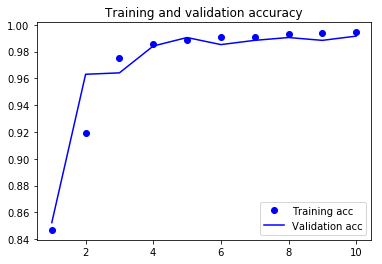

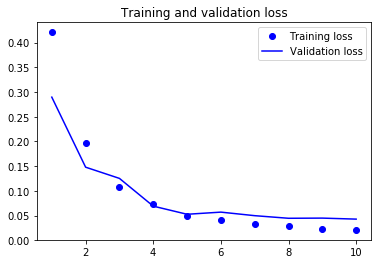

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
model = Sequential()
model.add(Embedding(max_words, 32))
model.add(SimpleRNN(32)) 
model.add(Dense(2, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(sequences_matrix, Y_train, epochs=10, batch_size=128,validation_split=0.2) #sequences_matrix substitui X_train

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________
Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 6s 2ms/step - loss: 0.5207 - acc: 0.7856 - val_loss: 0.6608 - val_acc: 0.6139

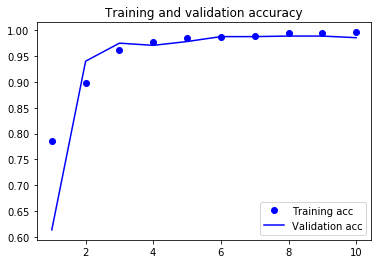

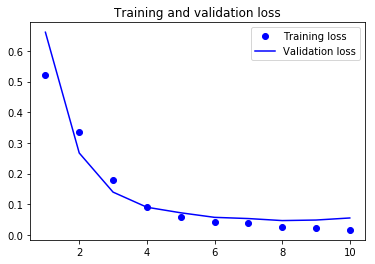

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Test the models in test dataset

In [49]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,Y_test)

836/836 [==============================] - 1s 1ms/step


In [50]:
print('Test set\n  Loss for Simple RNN: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss for Simple RNN: 0.065
  Accuracy: 0.982


In [53]:
accr = modelLSTM.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss for LSTM: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

836/836 [==============================] - 2s 3ms/step